## Titanic - Machine Learning from Disaster

- Description:
The sinking of a British passenger liner named "Titanic" occured in the North Atlantic Ocean on 15 April 1912, which recorded death toll of more than 1,500 out of the estimated 2,224 passengers and crew aboard.

- Task:
To build a model that predicts what sorts of people were more likely to survive from the disaster.

- Given:
891 train data and 418 test data with 12 features.

### Table of contents

1. Data scanning
    1. Check null data
    2. Check target label
2. Exploratory data analysis
    1. Pclass
    2. Sex
    3. Both-Sex and Pclass
    4. Age
    5. Pclass, Sex, Age
    6. Embarked
    7. Family - SibSp, Parch
    8. Cabin

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

c:\Users\after\miniconda3\envs\ai\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### 1. Check dataset

In [3]:
df_train = pd.read_csv('input/train.csv')
df_test = pd.read_csv('input/test.csv')

In [4]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Feature description

| Feature       | Description                                       | Data type |
| :---          | :---                                              | :---      |
| Survived      | 0 (died) or 1 (survived); target label            | Integer   |
| Pclass        | 1 (1st class) to 3 (3rd class)                    | Integer   |
| Sex           | Male or Female                                    | String    |
| Age           | 0 to 80                                           | Float     |
| SibSp         | # of siblings + spouse                            | Integer   |
| Parch         | # of parent(s) + children                         | Integer   |
| Ticket        | Ticket type and number                            | String    |
| Fare          | Fare in dollars                                   | Float     |
| Cabin         | Cabin number                                      | String    |
| Embarked      | C = Cherbourg, S = Southhampton, Q = Queenstown   | String    |

In [5]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### 1.1. Null data check

In [7]:
for col in df_train.columns:
    msg = "Column: {:>12}\t Ratio of NaN value: {:>7.3f}%".format(
                    col, 100 * df_train[col].isnull().sum() / df_train[col].shape[0])
    print(msg)

Column:  PassengerId	 Ratio of NaN value:   0.000%
Column:     Survived	 Ratio of NaN value:   0.000%
Column:       Pclass	 Ratio of NaN value:   0.000%
Column:         Name	 Ratio of NaN value:   0.000%
Column:          Sex	 Ratio of NaN value:   0.000%
Column:          Age	 Ratio of NaN value:  19.865%
Column:        SibSp	 Ratio of NaN value:   0.000%
Column:        Parch	 Ratio of NaN value:   0.000%
Column:       Ticket	 Ratio of NaN value:   0.000%
Column:         Fare	 Ratio of NaN value:   0.000%
Column:        Cabin	 Ratio of NaN value:  77.104%
Column:     Embarked	 Ratio of NaN value:   0.224%


In [8]:
for col in df_test.columns:
    msg = "Column: {:>12}\t Ratio of NaN value: {:>7.3f}%".format(
                    col, 100 * df_test[col].isnull().sum() / df_test[col].shape[0])
    print(msg)

Column:  PassengerId	 Ratio of NaN value:   0.000%
Column:       Pclass	 Ratio of NaN value:   0.000%
Column:         Name	 Ratio of NaN value:   0.000%
Column:          Sex	 Ratio of NaN value:   0.000%
Column:          Age	 Ratio of NaN value:  20.574%
Column:        SibSp	 Ratio of NaN value:   0.000%
Column:        Parch	 Ratio of NaN value:   0.000%
Column:       Ticket	 Ratio of NaN value:   0.000%
Column:         Fare	 Ratio of NaN value:   0.239%
Column:        Cabin	 Ratio of NaN value:  78.230%
Column:     Embarked	 Ratio of NaN value:   0.000%


<AxesSubplot:>

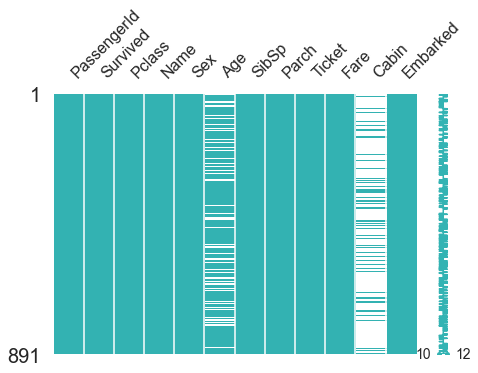

In [9]:
msno.matrix(df=df_train.iloc[:, :], figsize=(7.2, 4.8), color=(.2, .7, .7))

<AxesSubplot:>

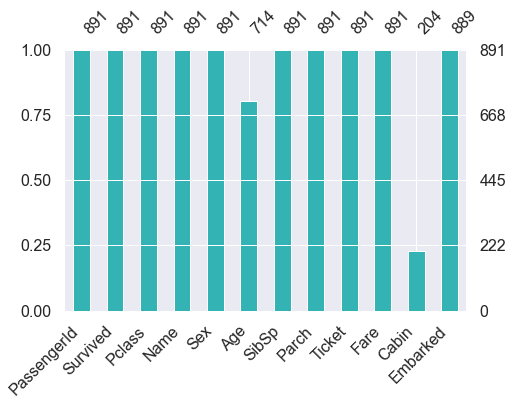

In [10]:
msno.bar(df=df_train.iloc[:, :], figsize=(7.2, 4.8), color=(.2, .7, .7))

<AxesSubplot:>

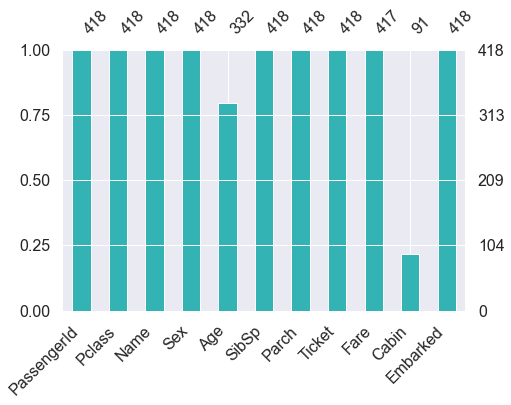

In [11]:
msno.bar(df=df_test.iloc[:, :], figsize=(7.2, 4.8), color=(.2, .7, .7))

#### 1.2. Check target label

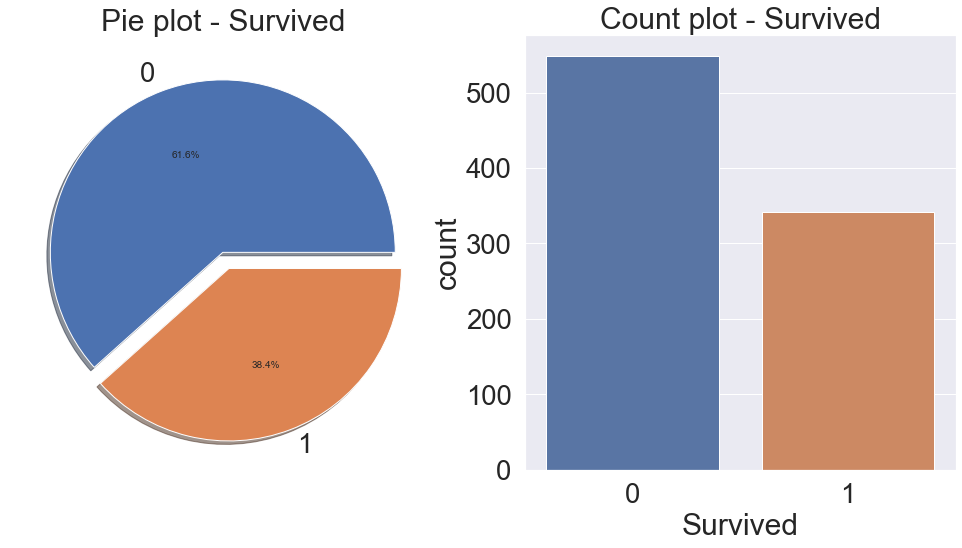

In [12]:
_, ax  = plt.subplots(1, 2, figsize=(17, 8))

df_train["Survived"].value_counts().plot.pie(explode=[0, .1], autopct="%1.1f%%", ax=ax[0], shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel("")
sns.countplot("Survived", data=df_train, ax=ax[1])
ax[1].set_title("Count plot - Survived")

plt.show()

### 2. Exploratory data analysis

#### 2.1. Pclass

In [13]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
pd.crosstab(df_train["Pclass"], df_train["Survived"], margins=True)\
  .style.background_gradient(cmap="summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

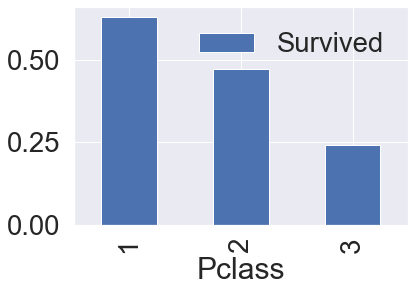

In [16]:
df_train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=True).mean()\
                                .sort_values(by="Survived", ascending=False).plot.bar()

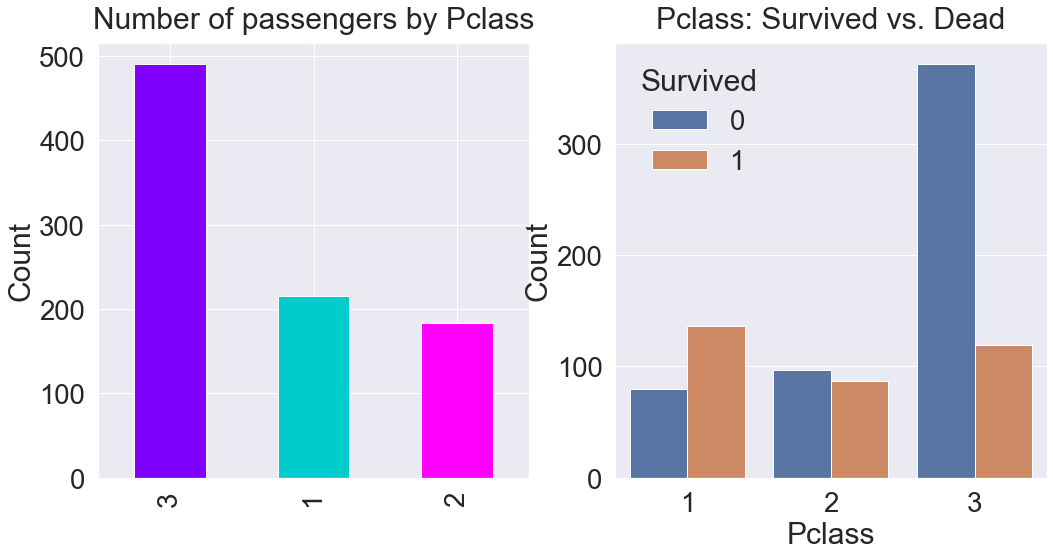

In [17]:
y_pos = 1.02
_, ax = plt.subplots(1, 2, figsize=(17, 8))
df_train["Pclass"].value_counts().plot.bar(color=["#7f00ff", "#00cccc", "#ff00ff"], ax=ax[0])
ax[0].set_title("Number of passengers by Pclass", y=y_pos)
ax[0].set_ylabel("Count")
sns.countplot("Pclass", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Pclass: Survived vs. Dead", y=y_pos)
ax[1].set_ylabel("Count")
plt.show()

#### 2.2. Sex

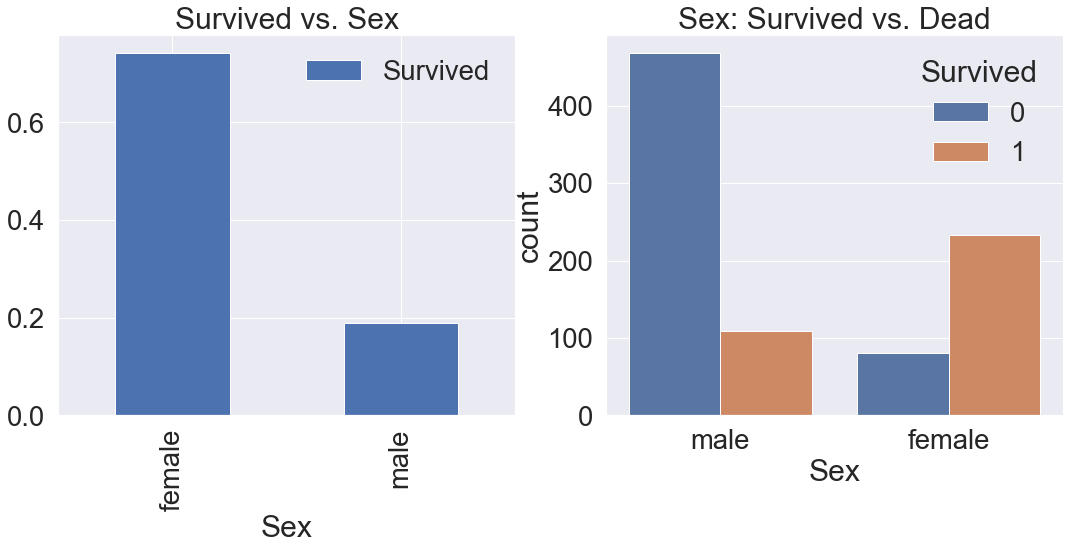

In [18]:
_, ax = plt.subplots(1, 2, figsize=(18, 7))
df_train[["Sex", "Survived"]].groupby(["Sex"], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title("Survived vs. Sex")
sns.countplot("Sex", hue="Survived", data=df_train, ax=ax[1])
ax[1].set_title("Sex: Survived vs. Dead")
plt.show()

#### References

[Titanic (wikipedia)](en.wikipedia.org/wiki/Titanic)

[Titanic tutorial by 이유한](https://kaggle-kr.tistory.com/17?category=868316)